# Optimización estocática

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from copy import copy

In [2]:
data = pd.read_csv("/Users/l4rralde/Desktop/Estudio CIMAT/propedeutico_cimat/to_rename/berlin52.tsp", delim_whitespace=True )

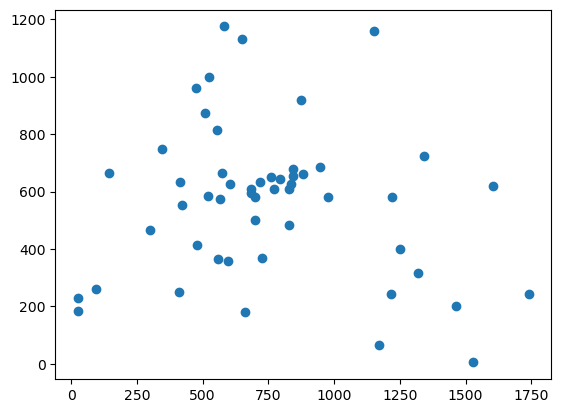

In [3]:
plt.scatter(data['x'], data['y'])

### Nearest Neighbor
Greedy algorithm

In [4]:
def nearest_neighbor(data: pd.DataFrame) -> list:
    points = list(data.values)
    nodo = points.pop(0)
    points_sorted = [nodo]
    while points:
        _, xe, ye = nodo
        norms = [((xp-xe)**2+(yp-ye)**2)**0.5 for _, xp, yp in points]
        nearest = np.argmin(norms)
        nodo = points.pop(nearest)
        points_sorted.append(nodo)
    return np.array(points_sorted)

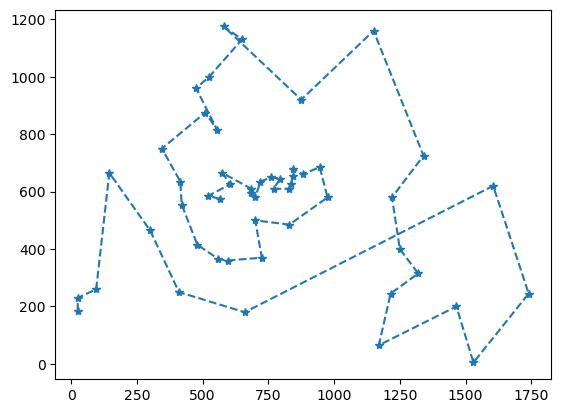

In [5]:
nodos = nearest_neighbor(data)
plt.plot(nodos[:,1], nodos[:,2], '*--')

Distancia acumulada

In [6]:
def acc_dist(points):
    pts_no_index = points[:,1:3]
    pts_1 = pts_no_index[:-1]
    pts_2 = pts_no_index[1:]
    diff = pts_2 - pts_1
    return np.sum(np.sqrt(np.sum(diff**2, axis=1)))
    

In [7]:
path = nodos[:,0]
print(path)

[ 1. 22. 49. 32. 36. 35. 34. 39. 40. 38. 37. 48. 24.  5. 15.  6.  4. 25.
 46. 44. 16. 50. 20. 23. 31. 18.  3. 19. 45. 41.  8. 10.  9. 43. 33. 51.
 12. 28. 27. 26. 47. 13. 14. 52. 11. 29. 30. 21. 17. 42.  7.  2.]


In [8]:
acc_dist(nodos)

8314.810179993954

### Temp annealing
Simulación de recocido

<img src="recocido.jpeg">

In [9]:
def temp(data: pd.DataFrame, t_max: float=100.0, alpha: float=0.999, t_min:float=0.01) -> list:
    #Initial guess
    t = t_max
    guess = nearest_neighbor(data)
    n = len(guess)
    
    best_solution = guess
    best_distance = acc_dist(best_solution)

    while t > t_min:
        #Generate a random neighbor
        new = copy(guess)
        i, j = random.sample(range(n), 2)
        new[i] = guess[j]
        new[j] = guess[i]

        #Compute error step
        old_acc = acc_dist(guess)
        new_acc = acc_dist(new)
        if new_acc < best_distance:
            print("Found a better solution")
            best_solution = new
            best_distance = acc_dist(best_solution)
        if new_acc < old_acc: #If better:
            guess = new
        else: #If not, probably take the random neighbor
            prob = np.exp(-(new_acc-old_acc)/t)
            if prob > random.random():
                guess = new
        t *= alpha
    return best_solution

In [33]:
sol_temp = temp(data)
acc_dist(sol_temp)

Found a better solution
Found a better solution
Found a better solution
Found a better solution
Found a better solution
Found a better solution
Found a better solution
Found a better solution
Found a better solution
Found a better solution
Found a better solution
Found a better solution


8064.678436525876

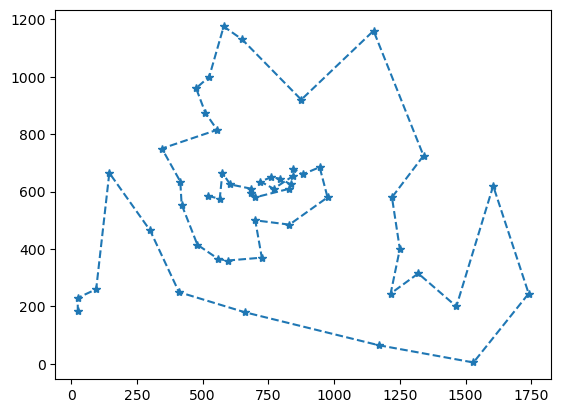

In [34]:
plt.plot(sol_temp[:,1], sol_temp[:,2], '*--')